In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the features and labels
X = np.load('/content/X.npy')
y = np.load('/content/y.npy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
# You can adjust parameters like n_estimators, max_depth, etc., as needed
# Set oob_score=True to calculate Out-of-Bag error
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.7104

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.73      0.71        48
         1.0       0.52      0.24      0.33        45
         2.0       0.75      0.93      0.83        90

    accuracy                           0.71       183
   macro avg       0.66      0.64      0.63       183
weighted avg       0.68      0.71      0.68       183



<Figure size 800x600 with 0 Axes>

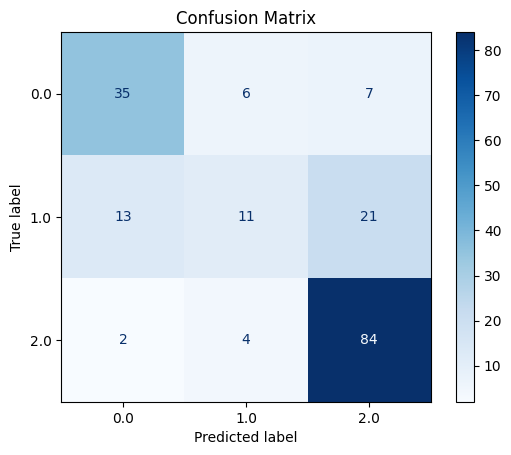

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure class_labels is defined. It was defined in a later cell (d3ef7d8c).
# For this cell to run independently, we can define it here if needed,
# or rely on it being defined in an earlier, executed cell.
# For consistency, we'll assume class_labels (from rf_classifier.classes_) is available.
# If not, you might define it as: class_labels = rf_classifier.classes_

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_labels, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

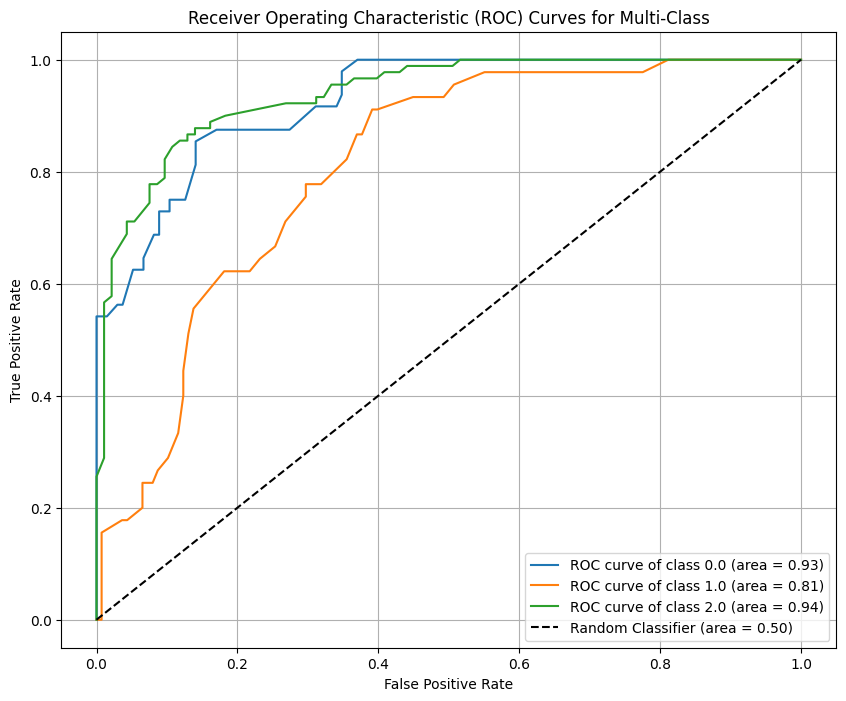

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Get predicted probabilities for each class, using rf_classifier and X_test
y_proba = rf_classifier.predict_proba(X_test)

# Binarize the true labels for multi-class ROC calculation
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test)

plt.figure(figsize=(10, 8))

# Plot ROC curve for each class, using class_labels
for i, class_name in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {class_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (area = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-Class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
y_train_pred = rf_classifier.predict(X_train)
y_train_proba = rf_classifier.predict_proba(X_train)

print("Generated predictions and probability scores for the training set.")

Generated predictions and probability scores for the training set.


<Figure size 800x600 with 0 Axes>

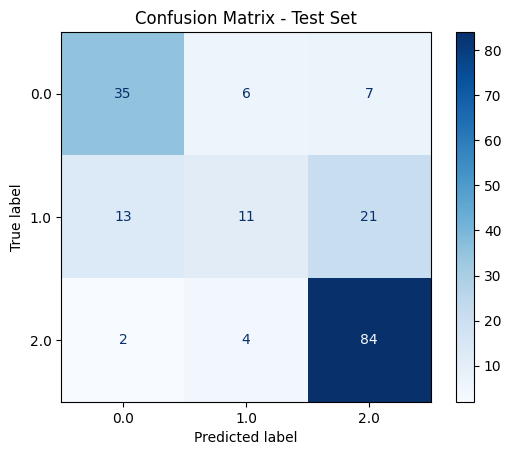

<Figure size 800x600 with 0 Axes>

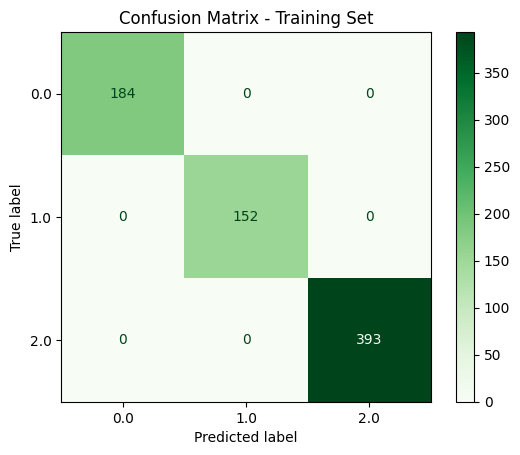

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get class labels from the classifier, if available, or use unique values from y
class_labels = rf_classifier.classes_ if hasattr(rf_classifier, 'classes_') else np.unique(np.concatenate((y_test, y_train)))

# --- Confusion Matrix for Test Set ---
cm_test = confusion_matrix(y_test, y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.grid(False)
plt.show()

# --- Confusion Matrix for Training Set ---
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Training Set')
plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Generate probability scores for the test set
y_test_proba = rf_classifier.predict_proba(X_test)

print("Necessary libraries imported and test set probabilities generated.")

Necessary libraries imported and test set probabilities generated.


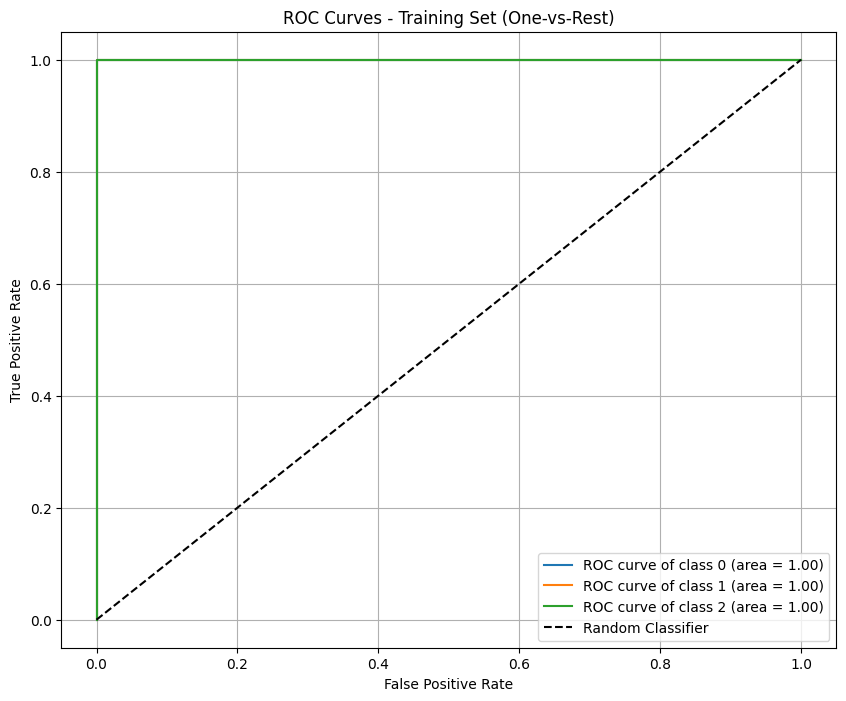

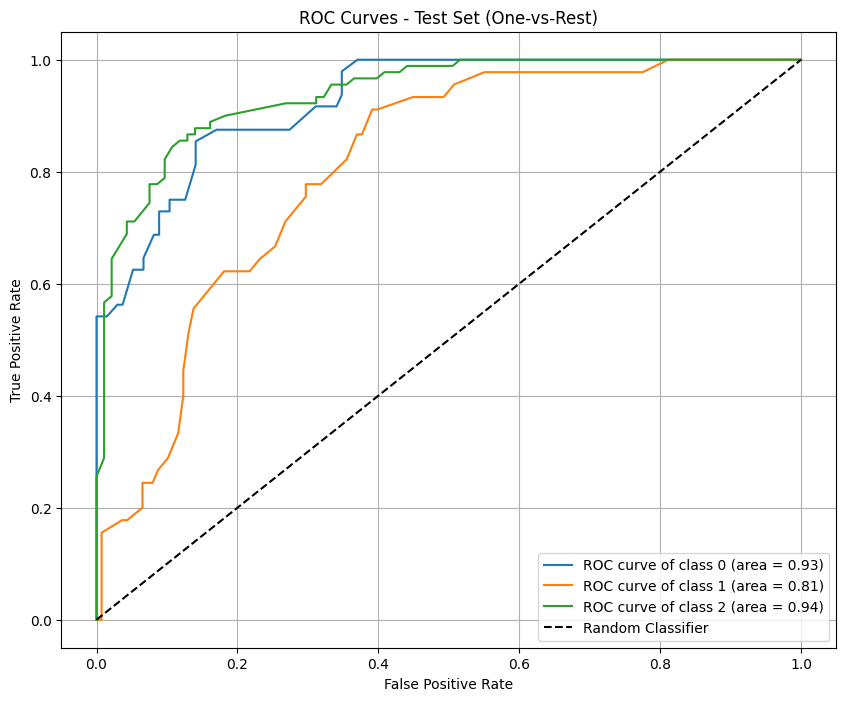

ROC curves for training and testing sets plotted.


In [ ]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')

y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

n_classes = y_test_onehot.shape[1]

# Calculate ROC curve and AUC for each class (One-vs-Rest) - Training Set
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_onehot[:, i], y_train_proba[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Calculate ROC curve and AUC for each class (One-vs-Rest) - Test Set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_onehot[:, i], y_test_proba[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC curves for Training Set
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve of class {i} (area = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Training Set (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for Test Set
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve of class {i} (area = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Test Set (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for training and testing sets plotted.")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of ccp_alpha values to explore
# Starting with 10 values between 0.0 and 0.1
param_grid = {
    'ccp_alpha': np.linspace(0.0, 0.1, 10)
}

# Set up GridSearchCV
# rf_classifier was defined in a previous cell (huCy6Z-BCny8)
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

print("GridSearchCV object initialized with ccp_alpha range and cross-validation setup.")

GridSearchCV object initialized with ccp_alpha range and cross-validation setup.


In [ ]:
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting complete. The search for the optimal ccp_alpha has been performed.")

GridSearchCV fitting complete. The search for the optimal ccp_alpha has been performed.


In [ ]:
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
best_estimator = grid_search.best_estimator_

print(f"Best ccp_alpha found: {best_ccp_alpha:.4f}")

# Make predictions on the test set using the best estimator
y_pred_best = best_estimator.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy of the best model: {accuracy_best:.4f}")

report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report for the best model:\n", report_best)

Best ccp_alpha found: 0.0000

Accuracy of the best model: 0.7104

Classification Report for the best model:
               precision    recall  f1-score   support

         0.0       0.70      0.73      0.71        48
         1.0       0.52      0.24      0.33        45
         2.0       0.75      0.93      0.83        90

    accuracy                           0.71       183
   macro avg       0.66      0.64      0.63       183
weighted avg       0.68      0.71      0.68       183



In [ ]:
if hasattr(best_estimator, 'oob_score_') and best_estimator.oob_score_ is not None:
    oob_accuracy = best_estimator.oob_score_
    oob_error = 1 - oob_accuracy

    print(f"\nOut-of-Bag (OOB) Accuracy of the best model: {oob_accuracy:.4f}")
    print(f"Out-of-Bag (OOB) Error of the best model: {oob_error:.4f}")
else:
    print("OOB score was not enabled or is not available for the best estimator.")



Out-of-Bag (OOB) Accuracy of the best model: 0.7257
Out-of-Bag (OOB) Error of the best model: 0.2743


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of n_estimators values to explore
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# Instantiate a RandomForestClassifier with oob_score=True and random_state=42
# It's important to use a new instance if we want to tune n_estimators independently
# However, the previous rf_classifier was already defined with n_estimators=100 and random_state=42, and oob_score=True
# For the purpose of tuning n_estimators, we'll use the existing rf_classifier, which will then have its n_estimators overridden by GridSearchCV's param_grid
# If starting fresh, one would typically instantiate a base RandomForestClassifier without specific n_estimators here.
# For consistency with the existing notebook flow, we'll reuse rf_classifier from huCy6Z-BCny8 which has the required oob_score=True and random_state=42.

# Set up GridSearchCV
grid_search_n_estimators = GridSearchCV(estimator=rf_classifier, # Reusing the classifier defined earlier.
                                        param_grid=param_grid,
                                        cv=5,
                                        scoring='accuracy',
                                        n_jobs=-1)

print("GridSearchCV object initialized with n_estimators range and cross-validation setup.")

GridSearchCV object initialized with n_estimators range and cross-validation setup.


### Tune `max_depth` to Reduce Overfitting

To further combat overfitting, we will tune the `max_depth` hyperparameter of the `RandomForestClassifier`. `max_depth` controls the maximum depth of each decision tree in the forest. By limiting this depth, we prevent individual trees from becoming too complex and overfitting the training data, thereby improving the model's generalization capabilities.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of max_depth values to explore
# A smaller range typically helps prevent overfitting
param_grid_max_depth = {
    'max_depth': [5, 10, 15, 20, None] # None means nodes are expanded until all leaves are pure or contain less than min_samples_split samples
}

# Re-initialize the RandomForestClassifier or use the existing one but be aware of previous tunings
# For simplicity and to focus on max_depth, we'll use a fresh instance with oob_score=True
# Or we can reuse the rf_classifier from the first cell (huCy6Z-BCny8) which already has oob_score=True and random_state=42
# Reusing the existing 'rf_classifier' will override its max_depth during grid search.

grid_search_max_depth = GridSearchCV(estimator=rf_classifier, # Reusing the classifier defined earlier.
                                     param_grid=param_grid_max_depth,
                                     cv=5,
                                     scoring='accuracy',
                                     n_jobs=-1)

print("GridSearchCV object initialized for max_depth tuning.")

GridSearchCV object initialized for max_depth tuning.


In [ ]:
grid_search_max_depth.fit(X_train, y_train)

print("GridSearchCV fitting complete for max_depth. The search for the optimal tree depth has been performed.")

GridSearchCV fitting complete for max_depth. The search for the optimal tree depth has been performed.


In [ ]:
best_max_depth = grid_search_max_depth.best_params_['max_depth']
best_estimator_max_depth = grid_search_max_depth.best_estimator_

print(f"Best max_depth found: {best_max_depth}")

# Make predictions on the test set using the best estimator
y_pred_max_depth = best_estimator_max_depth.predict(X_test)

# Evaluate the best model
accuracy_max_depth = accuracy_score(y_test, y_pred_max_depth)
print(f"\nAccuracy of the best max_depth model: {accuracy_max_depth:.4f}")

report_max_depth = classification_report(y_test, y_pred_max_depth)
print("\nClassification Report for the best max_depth model:\n", report_max_depth)

Best max_depth found: 15

Accuracy of the best max_depth model: 0.7158

Classification Report for the best max_depth model:
               precision    recall  f1-score   support

         0.0       0.70      0.73      0.71        48
         1.0       0.57      0.27      0.36        45
         2.0       0.75      0.93      0.83        90

    accuracy                           0.72       183
   macro avg       0.67      0.64      0.64       183
weighted avg       0.69      0.72      0.69       183



In [ ]:
if hasattr(best_estimator_max_depth, 'oob_score_') and best_estimator_max_depth.oob_score_ is not None:
    oob_accuracy_max_depth = best_estimator_max_depth.oob_score_
    oob_error_max_depth = 1 - oob_accuracy_max_depth

    print(f"\nOut-of-Bag (OOB) Accuracy of the best max_depth model: {oob_accuracy_max_depth:.4f}")
    print(f"Out-of-Bag (OOB) Error of the best max_depth model: {oob_error_max_depth:.4f}")
else:
    print("OOB score was not enabled or is not available for the best max_depth model.")


Out-of-Bag (OOB) Accuracy of the best max_depth model: 0.7257
Out-of-Bag (OOB) Error of the best max_depth model: 0.2743


In [ ]:
grid_search_n_estimators.fit(X_train, y_train)

print("GridSearchCV fitting complete for n_estimators. The search for the optimal number of trees has been performed.")

GridSearchCV fitting complete for n_estimators. The search for the optimal number of trees has been performed.


In [ ]:
best_n_estimators = grid_search_n_estimators.best_params_['n_estimators']
best_estimator_n_estimators = grid_search_n_estimators.best_estimator_

print(f"Best n_estimators found: {best_n_estimators}")

# Make predictions on the test set using the best estimator
y_pred_tuned = best_estimator_n_estimators.predict(X_test)

# Evaluate the best model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nAccuracy of the best n_estimators model: {accuracy_tuned:.4f}")

report_tuned = classification_report(y_test, y_pred_tuned)
print("\nClassification Report for the best n_estimators model:\n", report_tuned)

Best n_estimators found: 300

Accuracy of the best n_estimators model: 0.7104

Classification Report for the best n_estimators model:
               precision    recall  f1-score   support

         0.0       0.69      0.75      0.72        48
         1.0       0.56      0.22      0.32        45
         2.0       0.74      0.93      0.83        90

    accuracy                           0.71       183
   macro avg       0.66      0.64      0.62       183
weighted avg       0.68      0.71      0.67       183



In [ ]:
if hasattr(best_estimator_n_estimators, 'oob_score_') and best_estimator_n_estimators.oob_score_ is not None:
    oob_accuracy_tuned = best_estimator_n_estimators.oob_score_
    oob_error_tuned = 1 - oob_accuracy_tuned

    print(f"\nOut-of-Bag (OOB) Accuracy of the best n_estimators model: {oob_accuracy_tuned:.4f}")
    print(f"Out-of-Bag (OOB) Error of the best n_estimators model: {oob_error_tuned:.4f}")
else:
    print("OOB score was not enabled or is not available for the best n_estimators model.")


Out-of-Bag (OOB) Accuracy of the best n_estimators model: 0.7394
Out-of-Bag (OOB) Error of the best n_estimators model: 0.2606


In [ ]:
y_pred_max_depth_train = best_estimator_max_depth.predict(X_train)
y_proba_max_depth_train = best_estimator_max_depth.predict_proba(X_train)
y_proba_max_depth_test = best_estimator_max_depth.predict_proba(X_test)

print("Predictions and probability scores for the best max_depth model generated.")

Predictions and probability scores for the best max_depth model generated.


**Reasoning**:
The next step is to generate and display confusion matrices for both the training and test sets using the predictions from the best `max_depth` model. This will visually represent the model's performance on correctly and incorrectly classified instances.



<Figure size 800x600 with 0 Axes>

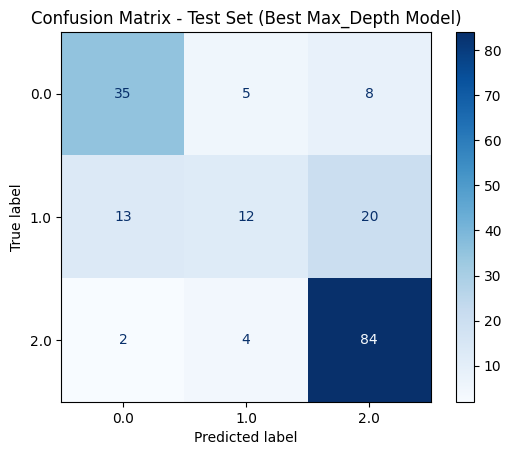

<Figure size 800x600 with 0 Axes>

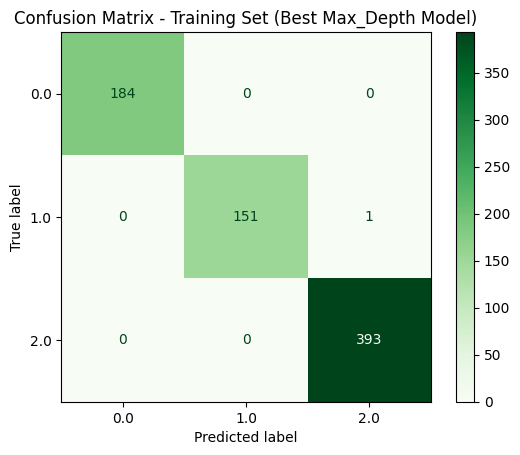

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get class labels from the classifier, if available, or use unique values from y
class_labels = rf_classifier.classes_ if hasattr(rf_classifier, 'classes_') else np.unique(np.concatenate((y_test, y_train)))

# --- Confusion Matrix for Test Set ---
cm_test_max_depth = confusion_matrix(y_test, y_pred_max_depth)
disp_test_max_depth = ConfusionMatrixDisplay(confusion_matrix=cm_test_max_depth, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp_test_max_depth.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set (Best Max_Depth Model)')
plt.grid(False)
plt.show()

# --- Confusion Matrix for Training Set ---
cm_train_max_depth = confusion_matrix(y_train, y_pred_max_depth_train)
disp_train_max_depth = ConfusionMatrixDisplay(confusion_matrix=cm_train_max_depth, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp_train_max_depth.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Training Set (Best Max_Depth Model)')
plt.grid(False)
plt.show()

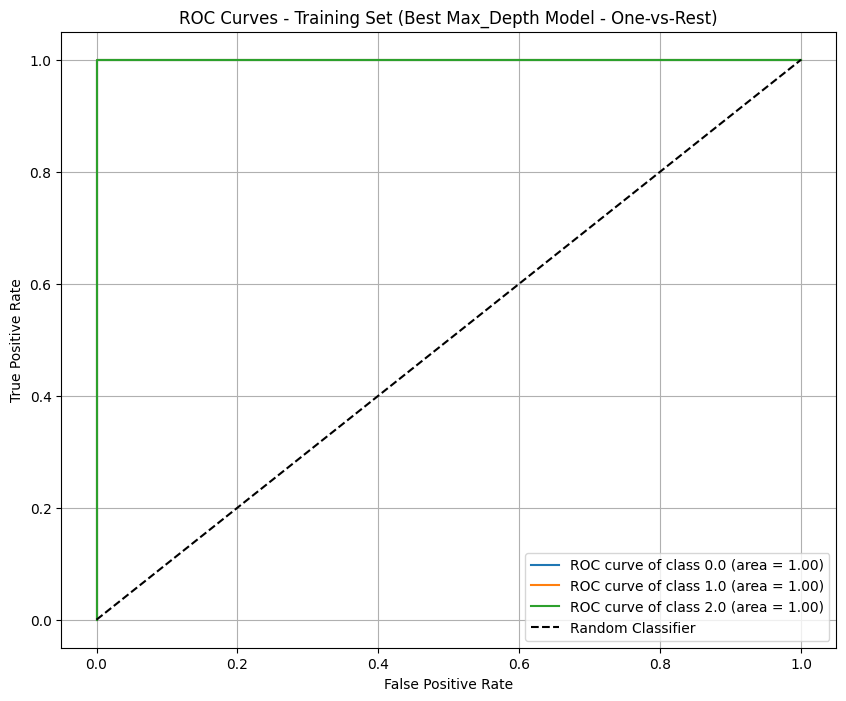

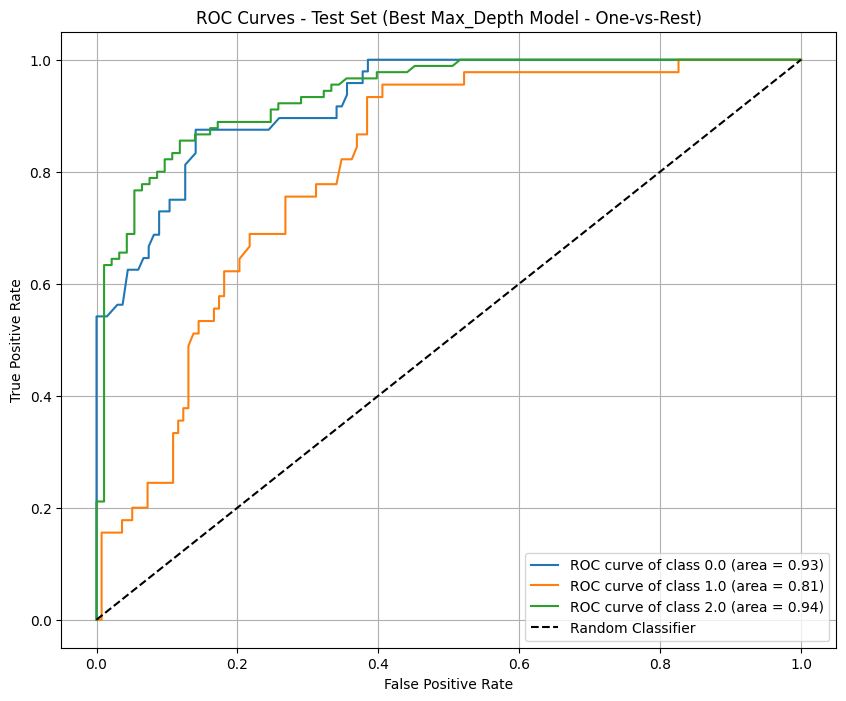

ROC curves for training and testing sets of the best max_depth model plotted.


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Binarize the true labels for multi-class ROC calculation (One-vs-Rest)
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

n_classes = y_test_onehot.shape[1]

# Calculate ROC curve and AUC for each class (One-vs-Rest) - Training Set
fpr_train_max_depth = dict()
tpr_train_max_depth = dict()
roc_auc_train_max_depth = dict()
for i in range(n_classes):
    fpr_train_max_depth[i], tpr_train_max_depth[i], _ = roc_curve(y_train_onehot[:, i], y_proba_max_depth_train[:, i])
    roc_auc_train_max_depth[i] = auc(fpr_train_max_depth[i], tpr_train_max_depth[i])

# Calculate ROC curve and AUC for each class (One-vs-Rest) - Test Set
fpr_test_max_depth = dict()
tpr_test_max_depth = dict()
roc_auc_test_max_depth = dict()
for i in range(n_classes):
    fpr_test_max_depth[i], tpr_test_max_depth[i], _ = roc_curve(y_test_onehot[:, i], y_proba_max_depth_test[:, i])
    roc_auc_test_max_depth[i] = auc(fpr_test_max_depth[i], tpr_test_max_depth[i])

# Plot ROC curves for Training Set
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_labels):
    plt.plot(fpr_train_max_depth[i], tpr_train_max_depth[i], label=f'ROC curve of class {class_name} (area = {roc_auc_train_max_depth[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Training Set (Best Max_Depth Model - One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for Test Set
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_labels):
    plt.plot(fpr_test_max_depth[i], tpr_test_max_depth[i], label=f'ROC curve of class {class_name} (area = {roc_auc_test_max_depth[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Test Set (Best Max_Depth Model - One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for training and testing sets of the best max_depth model plotted.")

In [ ]:
y_pred_n_estimators_train = best_estimator_n_estimators.predict(X_train)
y_proba_n_estimators_train = best_estimator_n_estimators.predict_proba(X_train)
y_proba_n_estimators_test = best_estimator_n_estimators.predict_proba(X_test)

print("Predictions and probability scores for the best n_estimators model generated.")

Predictions and probability scores for the best n_estimators model generated.


<Figure size 800x600 with 0 Axes>

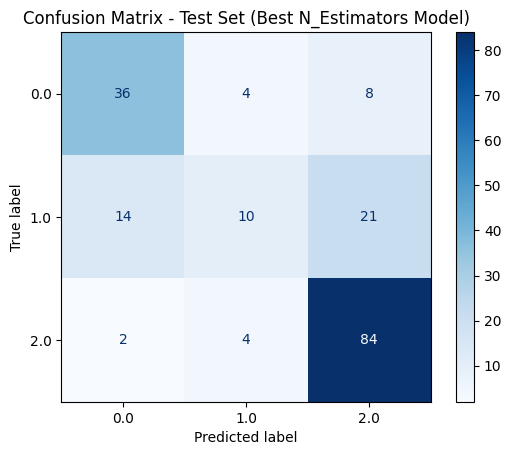

<Figure size 800x600 with 0 Axes>

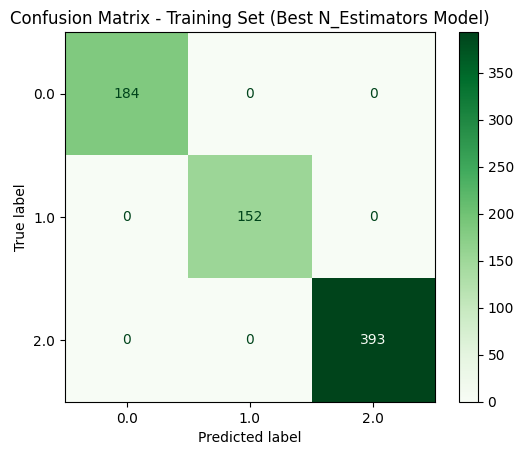

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get class labels from the classifier, if available, or use unique values from y
# Assuming class_labels is already defined in a previous cell (e.g., d3ef7d8c)
# If not, it would be: class_labels = rf_classifier.classes_ if hasattr(rf_classifier, 'classes_') else np.unique(np.concatenate((y_test, y_train)))

# --- Confusion Matrix for Test Set (best n_estimators model) ---
cm_test_n_estimators = confusion_matrix(y_test, y_pred_tuned)
disp_test_n_estimators = ConfusionMatrixDisplay(confusion_matrix=cm_test_n_estimators, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp_test_n_estimators.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set (Best N_Estimators Model)')
plt.grid(False)
plt.show()

# --- Confusion Matrix for Training Set (best n_estimators model) ---
cm_train_n_estimators = confusion_matrix(y_train, y_pred_n_estimators_train)
disp_train_n_estimators = ConfusionMatrixDisplay(confusion_matrix=cm_train_n_estimators, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp_train_n_estimators.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Training Set (Best N_Estimators Model)')
plt.grid(False)
plt.show()

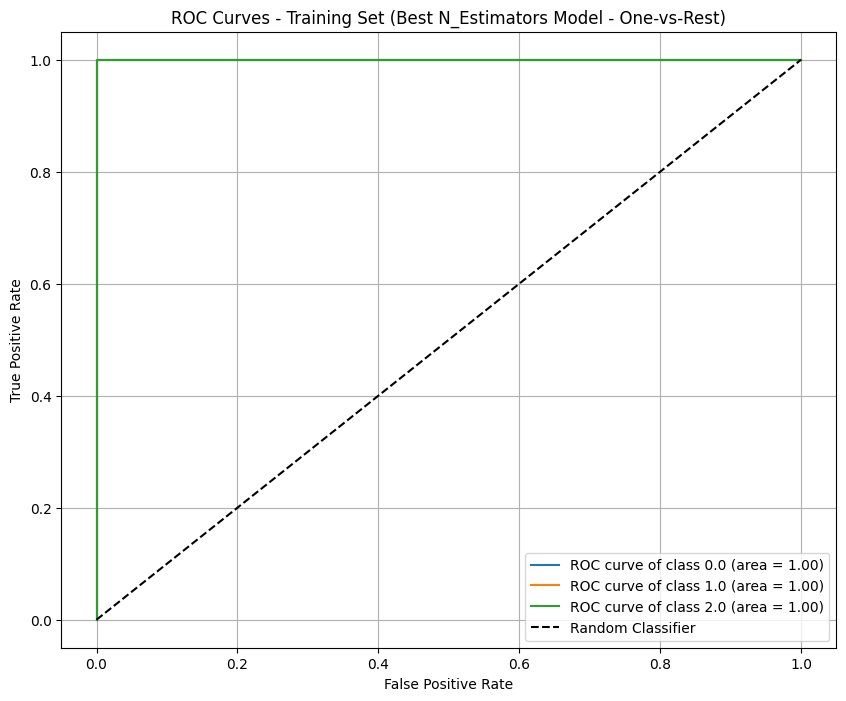

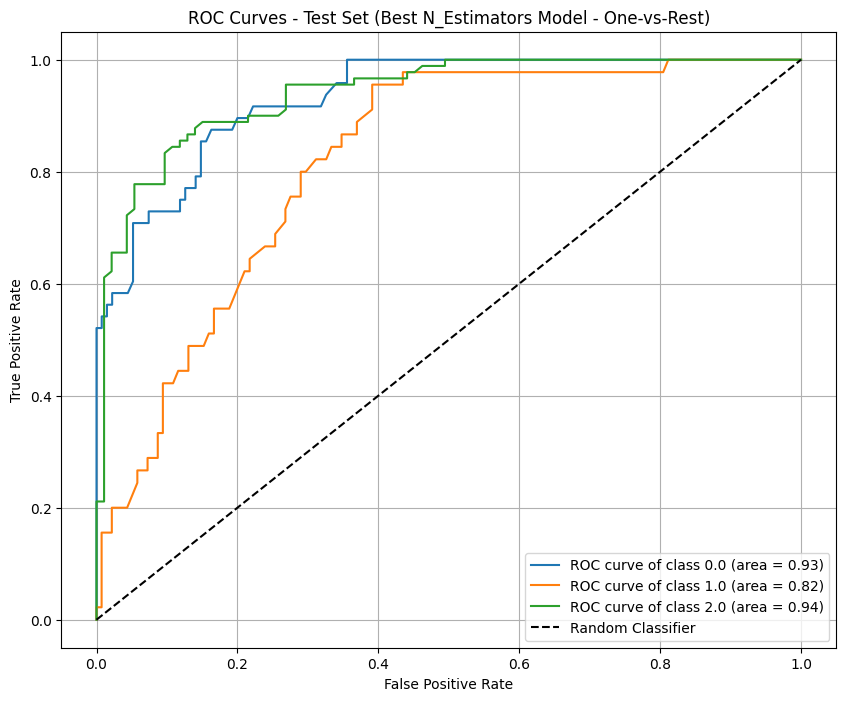

ROC curves for training and testing sets of the best n_estimators model plotted.


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Binarize the true labels for multi-class ROC calculation (One-vs-Rest)
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

n_classes = y_test_onehot.shape[1]

# Calculate ROC curve and AUC for each class (One-vs-Rest) - Training Set
fpr_train_n_estimators = dict()
tpr_train_n_estimators = dict()
roc_auc_train_n_estimators = dict()
for i in range(n_classes):
    fpr_train_n_estimators[i], tpr_train_n_estimators[i], _ = roc_curve(y_train_onehot[:, i], y_proba_n_estimators_train[:, i])
    roc_auc_train_n_estimators[i] = auc(fpr_train_n_estimators[i], tpr_train_n_estimators[i])

# Calculate ROC curve and AUC for each class (One-vs-Rest) - Test Set
fpr_test_n_estimators = dict()
tpr_test_n_estimators = dict()
roc_auc_test_n_estimators = dict()
for i in range(n_classes):
    fpr_test_n_estimators[i], tpr_test_n_estimators[i], _ = roc_curve(y_test_onehot[:, i], y_proba_n_estimators_test[:, i])
    roc_auc_test_n_estimators[i] = auc(fpr_test_n_estimators[i], tpr_test_n_estimators[i])

# Plot ROC curves for Training Set
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_labels):
    plt.plot(fpr_train_n_estimators[i], tpr_train_n_estimators[i], label=f'ROC curve of class {class_name} (area = {roc_auc_train_n_estimators[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Training Set (Best N_Estimators Model - One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for Test Set
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_labels):
    plt.plot(fpr_test_n_estimators[i], tpr_test_n_estimators[i], label=f'ROC curve of class {class_name} (area = {roc_auc_test_n_estimators[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Test Set (Best N_Estimators Model - One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for training and testing sets of the best n_estimators model plotted.")